# Exploring bistability in bacteriocin system using Lotka-Volterra

Fit gLV with data from pacman paper, changing initial conditions of x to explore bistability over short and long time conditions. Change intial conditions (amounts of each strain) to determine which species outcompetes the other due to different growth rates and interaction stengths, alter this for the interactions of EntA, B and AB.

In [1]:
import numpy as np
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Taking fitted parameters from pacman

In [18]:
post = pd.read_csv('posterior.csv') # fitted posteriors
post_med = post.median()

In [19]:
print(post_med)

mu.1.          0.033328
mu.2.          0.022984
mu.3.          0.036332
Md.1.         -0.065398
Md.2.         -0.038730
Md.3.         -0.088861
M12.1.        -0.049334
M21.1.        -0.022255
M21.2.        -0.024184
M21.3.        -0.024031
Ks.1.          0.001215
Ks.2.          0.292048
Ks.3.          0.015223
sigma          0.312163
y0_1_hat.1.    0.000730
y0_1_hat.2.    0.000595
y0_2_hat.1.    0.001731
y0_2_hat.2.    0.003069
y0_3_hat.1.    0.002389
y0_3_hat.2.    0.000200
y0_4_hat.1.    0.001965
y0_4_hat.2.    0.000238
y0_5_hat.1.    0.001262
y0_6_hat.1.    0.002855
y0_7_hat.1.    0.004706
y0_8_hat.1.    0.004588
y0_9_hat.1.    0.001580
dtype: float64


## Parameters

In [36]:
# Taken from fit-gLV-sat-all-Md3 of PM3 fit from pacman paper

muEc_c = abs(post_med['mu.1.']) # Ec control growth rate
muEc = abs(post_med['mu.1.']) # Ec producing bacteriocin growth rate
muEf = abs(post_med['mu.3.'])  # Ef growth rate
M11 = abs(post_med['Md.2.'])  # Ec -> Ec
M22 = abs(post_med['Md.3.'])   # Ef -> Ef
M12 = abs(post_med['M12.1.'])  # Ef -> Ec
M21_EntA = abs(post_med['M21.1.']) # EcEntA -> Ef
M21_EntB = abs(post_med['M21.2.']) # EcEntB -> Ef
M21_EntAB = abs(post_med['M21.3.']) # EcEntAB -> Ef

Ks_EntA = abs(post_med['Ks.1.'])
Ks_EntB = abs(post_med['Ks.2.'])
Ks_EntAB = abs(post_med['Ks.3.'])

In [37]:
print(muEc_c,muEc,muEf,M11,M22,M12,M21_EntA,M21_EntB,M21_EntAB,Ks_EntA,Ks_EntB,Ks_EntAB)

0.033328281132065346 0.033328281132065346 0.0363320961794854 0.03872987667387545 0.0888612551920666 0.0493339883772232 0.0222552935928312 0.0241836699300289 0.02403055087682115 0.00121512703046095 0.292047702641047 0.015223212927133401


## Generalised model

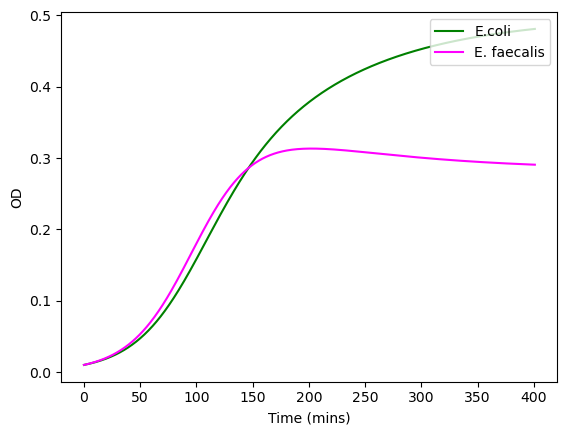

In [27]:
def lv_gen(X, t, muEc, muEf, M11, M22, M12, M21_EntA):

    x1, x2 = X
    dx1_dt = x1*muEc - x1*M11*x1 - x1*M12*x2 
    dx2_dt = x2*muEf - x2*M22*x2-x2*M21_EntA*x1               
   
    return(np.array([dx1_dt, dx2_dt]))



# Initial conditions = x1 and x2

x1 = 0.01  # Ec
x2 = 0.01  # Ef

# Time points
t = np.linspace(0, 401, 1000)
#print(t)

args = (muEc, muEf, M11, M22, M12, M21_EntA)
initial_con = [x1, x2]

# Solving the system of differential equations
solution = odeint(lv_gen, initial_con, t, args=args)

# Separating the solutions for each species
x1, x2 = solution.T

# plotting interaction
plt.plot(t, x1, color = "green", label = "E.coli")
plt.plot(t, x2, color = "magenta", label = "E. faecalis")
plt.legend(loc = "upper right")
plt.xlabel("Time (mins)")
plt.ylabel("OD")
plt.show()



## Saturated model

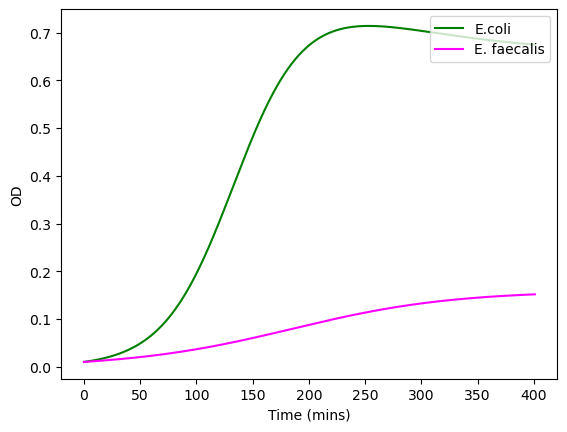

In [28]:

def lv_sat(X, t, muEc, muEf, M11, M22, M12, M21_EntA, Ks_EntA):

    x1, x2 = X
    dx1_dt = x1*muEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*muEf - x2*M22*x2-(x2*M21_EntA*x1/(Ks_EntA+x1))               
    return(np.array([dx1_dt, dx2_dt]))




# Initial conditions = x1 and x2

x1 = 0.01  # Ec
x2 = 0.01  # Ef

# Time points
t = np.linspace(0, 401, 1000)
#print(t)


args = (muEc, muEf, M11, M22, M12, M21_EntA, Ks_EntA)
initial_con = [x1, x2]

# Solving the system of differential equations
solution = odeint(lv_sat, initial_con, t, args=args)

# Separating the solutions for each species
x1, x2 = solution.T

# plotting interaction
plt.plot(t, x1, color = "green", label = "E.coli")
plt.plot(t, x2, color = "magenta", label = "E. faecalis")
plt.legend(loc = "upper right")
plt.xlabel("Time (mins)")
plt.ylabel("OD")
plt.show()


## Saturated model in grid

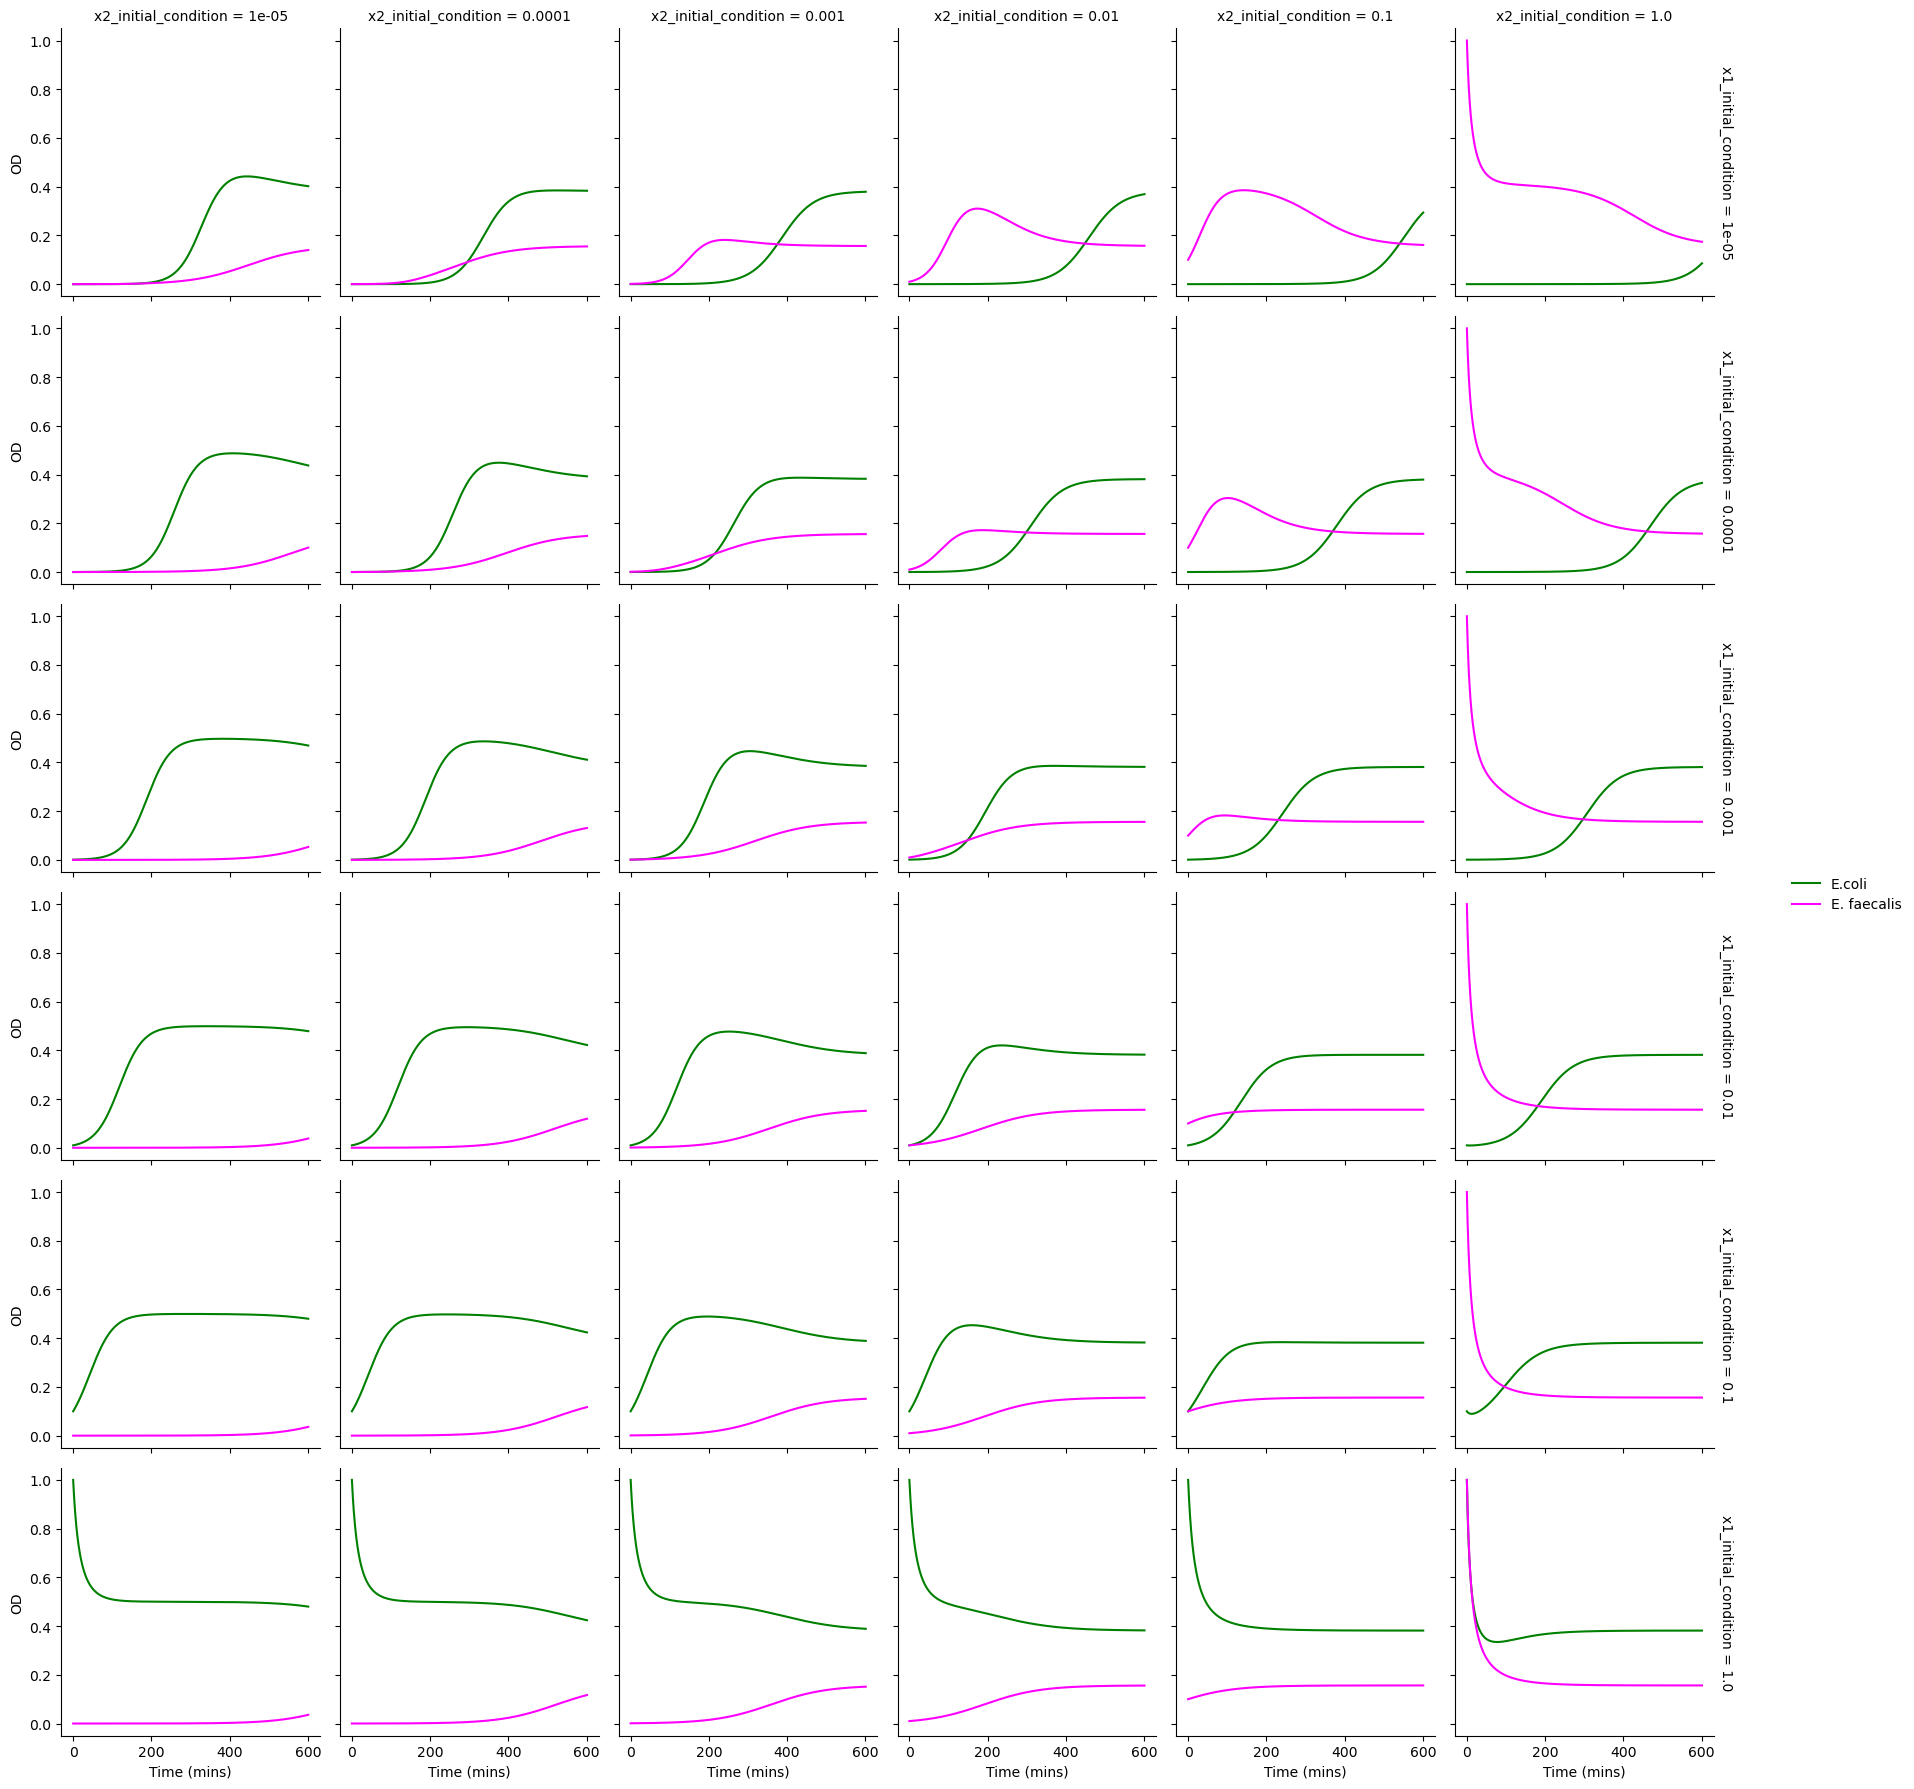

<Figure size 196.85x196.85 with 0 Axes>

In [31]:
# Saturated Model in grid

def lv_sat(X, t, muEc, muEf, M11, M22, M12, M21_EntA, Ks_EntA):

    x1, x2 = X
    dx1_dt = x1*muEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*muEf - x2*M22*x2-(x2*M21_EntA*x1/(Ks_EntA+x1))               
    return(np.array([dx1_dt, dx2_dt]))



# Time points
t = np.linspace(0, 601, 1000)

# Initial conditions range
x1_initial_conditions = (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
x2_initial_conditions = (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)

# Create an empty DataFrame to store data
data_df = pd.DataFrame()

# Loop over initial conditions
for x1_initial_condition in x1_initial_conditions:
    for x2_initial_condition in x2_initial_conditions:
        args = (muEc, muEf, M11, M22, M12, M21_EntA, Ks_EntA)
        initial_conditions = [x1_initial_condition, x2_initial_condition]

        # Solving the system of differential equations
        solution = odeint(lv_sat, initial_conditions, t, args=args)

        # Separating the solutions for each species
        x1, x2 = solution.T

        # Add data to the DataFrame
        temp_df = pd.DataFrame({'t': t, 'x1': x1, 'x2': x2,
                                'x1_initial_condition': x1_initial_condition,
                                'x2_initial_condition': x2_initial_condition})

        # Concatenate data to the main DataFrame
        data_df = pd.concat([data_df, temp_df], ignore_index=True)

# Set up subplots using Seaborn facet grid
grid = sns.FacetGrid(data=data_df, col="x2_initial_condition", row="x1_initial_condition", margin_titles=True)
grid.map(plt.plot, 't', 'x1', color="green", label="E.coli")
grid.map(plt.plot, 't', 'x2', color="magenta", label="E. faecalis")
grid.set_axis_labels("Time (mins)", "OD")
grid.add_legend()

# Show the facet grid
plt.show()



# Set figure size in inches (convert mm to inches)
fig_width = 50 / 25.4  # convert mm -> inches
fig_height = 50 / 25.4  


# Create a new figure and set its size
fig = plt.figure(figsize=(fig_width, fig_height))

# Save figure as PDF
#grid.savefig('output_facetgrid.pdf')

# Show the plot (optional)
plt.show()


